In [1]:
from denn.utils import Discriminator, Generator
from denn.sho.gan_sho import train_GAN_SHO
import torch.nn as nn

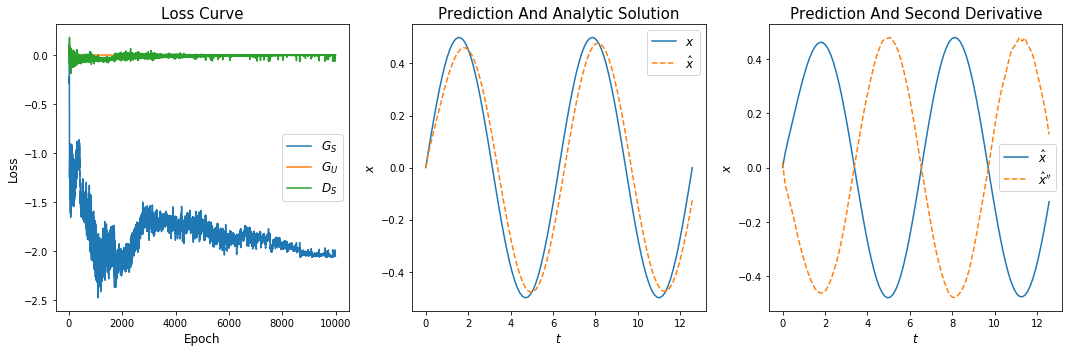

In [3]:
G = Generator(in_dim=1, out_dim=1,
              n_hidden_units=32,
              n_hidden_layers=4,
              activation=nn.Tanh(), # twice diff'able activation
              output_tan=True,      # true output range should be (-1,1) if True
              residual=True)

D = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=32,
                  n_hidden_layers=4,
                  activation=nn.Tanh(),
                  unbounded=True, # true for WGAN
                  residual=True)

res = train_GAN_SHO(G, D, final_plot=True, num_epochs=10000)

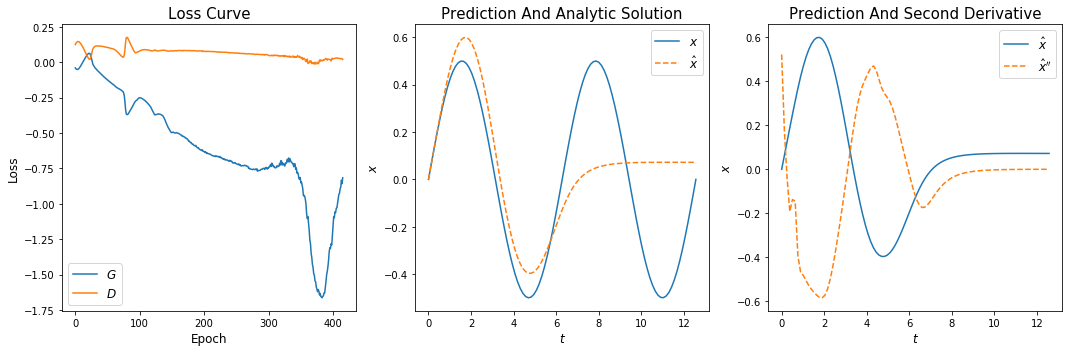

In [ ]:
G = Generator(in_dim=1, out_dim=1,
              n_hidden_units=32,
              n_hidden_layers=4,
              activation=nn.Tanh(), # twice diff'able activation
              output_tan=True,      # true output range should be (-1,1) if True
              residual=True)

D = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=32,
                  n_hidden_layers=4,
                  activation=nn.Tanh(),
                  unbounded=True, # true for WGAN
                  residual=True)

res = train_GAN_SHO(G, D, final_plot=True, d_lr=2e-4,  g_lr=1e-3, num_epochs=10000, realtime_plot=True, check_every=5)